In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [34]:
df1 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/item.csv')
df1.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [35]:
df1.shape

(251, 4)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [37]:
df1['Item Code'] = df1['Item Code'].astype(str)

In [38]:
df1.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [39]:
df1['Category Name'].value_counts()

Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [40]:
def rename_category(data):
    if data == 'Flower/Leaf Vegetables':
        return 'Flower'
    return data

df1['Category Name'] = df1['Category Name'].apply(rename_category)
df1['Category Name'].value_counts()

Category Name
Flower                         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [41]:
df2 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/loss rate.csv')
df2.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [42]:
df2.shape

(251, 3)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [44]:
df2['Item Code'] = df2['Item Code'].astype(str)

In [45]:
df2.isnull().sum()

Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x28b1eaa30>,
 'caps': [<matplotlib.lines.Line2D at 0x28b1eaf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b1ea790>],
 'medians': [<matplotlib.lines.Line2D at 0x28b1f74f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b1f7640>],
 'means': []}

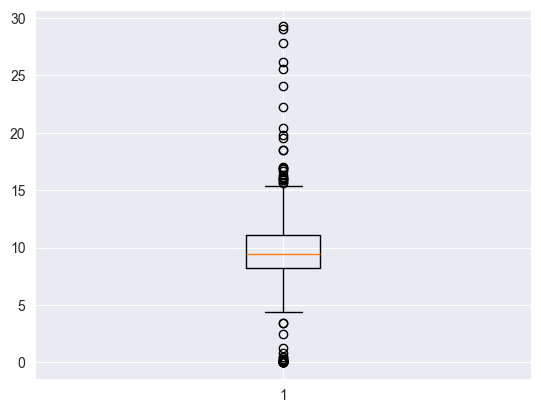

In [46]:
plt.boxplot(df2['Loss Rate (%)'])

In [47]:
(df2['Loss Rate (%)'] < 0).sum()

0

In [48]:
df3 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/sale.csv')
df3.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


{'whiskers': [<matplotlib.lines.Line2D at 0x29036d160>,
 'caps': [<matplotlib.lines.Line2D at 0x29036d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29035de80>],
 'medians': [<matplotlib.lines.Line2D at 0x29036dbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29036de80>],
 'means': []}

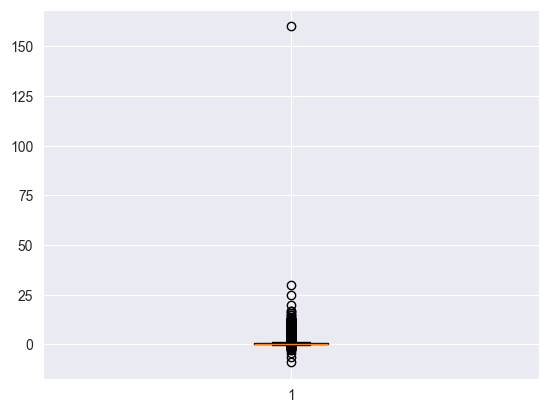

In [49]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [50]:
(df3['Quantity Sold (kilo)'] < 0).sum() == (df3['Sale or Return'] == 'return').sum()

True

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [52]:
df3.shape

(878503, 7)

In [53]:
df3.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [54]:
(df3['Time'].value_counts() > 1).sum()

27452

In [55]:
df3['Time'].nunique()

849632

In [56]:
def change_time_format(data):
    return data.split('.')[0]

df3['Time'] = df3['Time'].apply(change_time_format)
np.average(df3['Time'].value_counts())

19.050265640247208

In [57]:
df3['Date'].nunique() / 365

2.9726027397260273

In [58]:
df3['CustomerId'] = np.NAN

for i in range(df3.shape[0]):
    df3['CustomerId'].values[i] = random.randint(1,df3.shape[0] // 4)
df3['CustomerId'].value_counts()

CustomerId
65384.0     15
192114.0    15
111350.0    14
133298.0    14
72815.0     14
            ..
5328.0       1
129917.0     1
216831.0     1
43210.0      1
141243.0     1
Name: count, Length: 215568, dtype: int64

In [59]:
for i in range(df3.shape[0] - 1):
    i += 1
    if df3['Date'].values[i] == df3['Date'].values[i - 1] and df3['Time'].values[i] == df3['Time'].values[i - 1]:
        df3['CustomerId'].values[i] = df3['CustomerId'].values[i - 1]

In [60]:
df3['InvoiceID'] = df3['CustomerId']

In [65]:
(df3['InvoiceID'].value_counts() > 1).count()

212591

In [61]:
np.average(df3['InvoiceID'].value_counts())

4.132362141388864

In [31]:
df3['Item Code'].value_counts()

Item Code
102900011016701    69945
102900005116714    58905
102900005116530    47509
102900005115779    39887
102900005116899    39285
                   ...  
102900051000890        1
102900011023075        1
102900011009772        1
102900011031858        1
106973223300667        1
Name: count, Length: 246, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16cd63fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16cd72550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16cd63d30>],
 'medians': [<matplotlib.lines.Line2D at 0x16cd729d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16cd72c70>],
 'means': []}

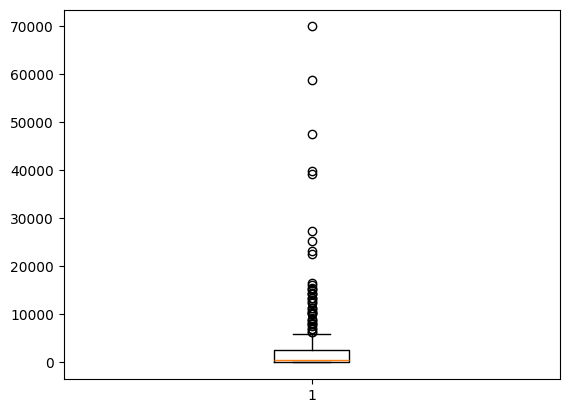

In [32]:
plt.boxplot(df3['Item Code'].value_counts())

In [33]:
data = {'present': [False] * df3['Item Code'].unique().shape[0]}
present = pd.DataFrame(data)

for i in range(df3['Item Code'].unique().shape[0]):
    for j in range(df1['Item Code'].shape[0]):
        if df3['Item Code'].values[i] == int(df1['Item Code'].values[j]):
            present.at[i, 'present'] = True
            break
            
present['present'].value_counts()

present
True    246
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16cd26220>,
 'caps': [<matplotlib.lines.Line2D at 0x16cde0c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16cd93160>],
 'medians': [<matplotlib.lines.Line2D at 0x16cdf7190>],
 'fliers': [<matplotlib.lines.Line2D at 0x16cdf7430>],
 'means': []}

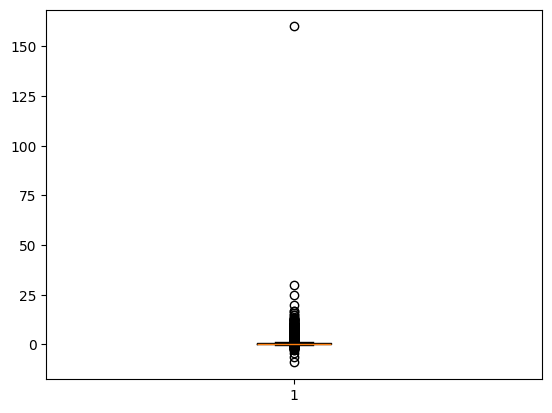

In [34]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [35]:
(df3['Quantity Sold (kilo)'] > 75).sum()

1

In [36]:
df3 = df3[~(df3['Quantity Sold (kilo)'] > 75)]

In [37]:
((df3['Quantity Sold (kilo)'] < 0).sum()) == ((df3['Sale or Return'] == 'return').sum())

True

{'whiskers': [<matplotlib.lines.Line2D at 0x16ce586a0>,
 'caps': [<matplotlib.lines.Line2D at 0x16ce58be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ce58520>],
 'medians': [<matplotlib.lines.Line2D at 0x16ce6a160>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ce6a400>],
 'means': []}

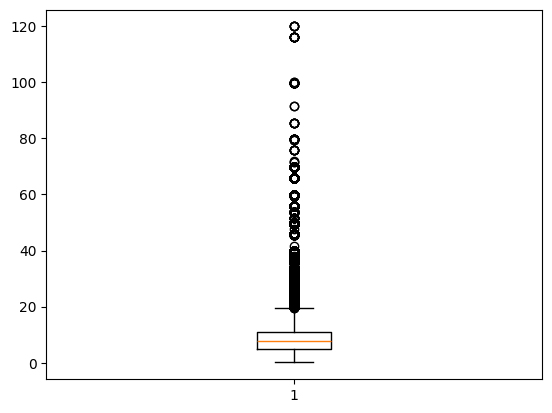

In [38]:
plt.boxplot(df3['Unit Selling Price (RMB/kg)'])

In [39]:
df3.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId
0,2020-07-01,09:15:07,102900005117056,0.396,7.6,sale,No,462465.0
1,2020-07-01,09:17:27,102900005115960,0.849,3.2,sale,No,412943.0
2,2020-07-01,09:17:33,102900005117056,0.409,7.6,sale,No,528592.0
3,2020-07-01,09:19:45,102900005115823,0.421,10.0,sale,No,827685.0
4,2020-07-01,09:20:23,102900005115908,0.539,8.0,sale,No,159829.0


In [40]:
dff = df3.copy()
dff['Item Code'] = dff['Item Code'].astype(str)
dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(str)
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(str)
dff['InvoiceID'] = dff['InvoiceID'].astype(str)
dff.sample(5)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId
438435,2021-10-10,12:43:16,106949711300167,1.0,2.9,sale,No,592043.0
197601,2021-01-14,11:26:14,102900005125808,0.15,69.8,sale,No,714545.0
138158,2020-11-09,16:24:41,102900005122654,0.602,8.0,sale,No,434301.0
719422,2022-11-19,18:40:56,102900005115977,0.138,16.0,sale,No,418706.0
348057,2021-07-02,09:40:13,102900005116219,0.439,8.0,sale,No,591199.0


In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878502 entries, 0 to 878502
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         878502 non-null  object
 1   Time                         878502 non-null  object
 2   Item Code                    878502 non-null  object
 3   Quantity Sold (kilo)         878502 non-null  object
 4   Unit Selling Price (RMB/kg)  878502 non-null  object
 5   Sale or Return               878502 non-null  object
 6   Discount (Yes/No)            878502 non-null  object
 7   CustomerId                   878502 non-null  object
dtypes: object(8)
memory usage: 60.3+ MB


In [42]:
df2['Loss Rate (%)'] = df2['Loss Rate (%)'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    object
 1   Item Name      251 non-null    object
 2   Loss Rate (%)  251 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    object
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.0+ KB


In [44]:
dff.shape

(878502, 8)

In [45]:
for i in range(dff.shape[0]):
    for j in range(df1.shape[0]):
        if dff['Item Code'].values[i] == df1['Item Code'].values[j]:
            dff.at[i, 'Item Name'] = df1['Item Name'].values[j]
            dff.at[i, 'Category Name'] = df1['Category Name'].values[j]
            break
dff.sample(5)

/var/folders/qv/2cgrx72x07s_x1_dr8tbjgxw0000gn/T/ipykernel_6745/3348089552.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Paopaojiao (Jingpin)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dff.at[i, 'Item Name'] = df1['Item Name'].values[j]
/var/folders/qv/2cgrx72x07s_x1_dr8tbjgxw0000gn/T/ipykernel_6745/3348089552.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Capsicum' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dff.at[i, 'Category Name'] = df1['Category Name'].values[j]


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name
279730,2021-04-07,10:11:28,102900005118831,1.0,5.9,sale,No,633109.0,Wawacai,Flower
622756,2022-08-05,10:56:52,102900011016701,0.48,4.0,sale,No,371889.0,Broccoli,Cabbage
846909,2023-05-09,19:27:27,102900005116257,0.214,8.0,sale,No,629816.0,Cabbage Stem (Bag),Flower
137508,2020-11-08,17:52:14,102900011009970,0.503,4.0,sale,No,14322.0,Qinggengsanhua,Cabbage
750286,2023-01-02,17:02:56,102900011033906,1.026,1.6,sale,No,718284.0,Xixia Mushroom (1),Edible Mushroom


In [46]:
for i in range(dff.shape[0]):
    for j in range(df2.shape[0]):
        if dff['Item Code'].values[i] == df2['Item Code'].values[j]:
            dff.at[i, 'Loss Rate'] = df2['Loss Rate (%)'].values[j]
            break
dff.sample(5)

/var/folders/qv/2cgrx72x07s_x1_dr8tbjgxw0000gn/T/ipykernel_6745/2070982995.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.08' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dff.at[i, 'Loss Rate'] = df2['Loss Rate (%)'].values[j]


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name,Loss Rate
380278,2021-08-06,18:55:10,102900005115779,0.188,8.0,sale,No,124109.0,Yunnan Shengcai,Flower,15.25
752038,2023-01-05,14:00:57,102900005118831,1.0,3.5,sale,No,445265.0,High Melon (2),Aquatic Tuberous Vegetables,9.43
549026,2022-04-13,16:12:54,102900005115762,0.357,2.0,sale,No,310395.0,Amaranth,Flower,18.52
637773,2022-08-18,20:41:51,102900005116714,0.431,7.0,sale,No,215021.0,Needle Mushroom (2),Edible Mushroom,9.43
860315,2023-05-31,10:58:43,102900005115786,0.352,6.0,sale,No,365652.0,Ginger And Xiaomijiao Mix (Small Bag),Capsicum,9.43


In [47]:
dff.isnull().sum()

Date                           1
Time                           1
Item Code                      1
Quantity Sold (kilo)           1
Unit Selling Price (RMB/kg)    1
Sale or Return                 1
Discount (Yes/No)              1
CustomerId                     1
Item Name                      1
Category Name                  1
Loss Rate                      1
dtype: int64

In [48]:
dff = dff.dropna()
dff.sample(5)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name,Loss Rate
53787,2020-08-18,14:44:03,102900005115762,0.482,5.0,sale,No,150081.0,Amaranth,Flower,18.52
351408,2021-07-05,16:27:07,102900051000463,0.401,6.0,sale,No,854766.0,Round Eggplant (2),Solanum,6.71
688101,2022-10-15,11:42:09,106949711300259,1.0,3.5,sale,No,43570.0,Cabbage Stem (Bag),Flower,9.43
65593,2020-08-28,15:13:13,102900011009970,0.414,8.0,sale,No,235122.0,Qinggengsanhua,Cabbage,17.06
811395,2023-03-18,11:39:27,102900011034026,0.411,8.8,sale,No,349488.0,Green Eggplant (1),Solanum,5.01


In [49]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['Time'] = pd.to_timedelta(dff['Time'])


dff['Year'] = dff['Date'].dt.year
dff['Month'] = dff['Date'].dt.month
dff['Day'] = dff['Date'].dt.day
dff['Hour'] = dff['Time'].dt.components['hours']
dff['Minute'] = dff['Time'].dt.components['minutes']
dff['Second'] = dff['Time'].dt.components['seconds']

dff = dff.drop(['Date', 'Time'], axis = 1)

In [51]:
dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(float) * 1000
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(float) * 1000
dff['Loss Rate'] = dff['Loss Rate'].astype(float) * 100

In [52]:
dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(str).str[:-2]
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(str).str[:-2]
dff['Loss Rate'] = dff['Loss Rate'].astype(str).str[:-2]
dff['InvoiceID'] = dff['InvoiceID'].str[:-2]

In [53]:
dff = dff.rename(columns={'Quantity Sold (kilo)': 'Quantity Sold (g)', 'Unit Selling Price (RMB/kg)': 'Unit Selling Price (RMB/g)'})
dff.head()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name,Loss Rate,Year,Month,Day,Hour,Minute,Second
0,102900005117056,396,7600,sale,No,462465,Paopaojiao (Jingpin),Capsicum,708,2020,7,1,9,15,7
1,102900005115960,849,3200,sale,No,412943,Chinese Cabbage,Flower,2227,2020,7,1,9,17,27
2,102900005117056,409,7600,sale,No,528592,Paopaojiao (Jingpin),Capsicum,708,2020,7,1,9,17,33
3,102900005115823,421,10000,sale,No,827685,Shanghaiqing,Flower,1443,2020,7,1,9,19,45
4,102900005115908,539,8000,sale,No,159829,Caixin,Flower,1370,2020,7,1,9,20,23


In [54]:
dff.shape

(878501, 15)

In [55]:
item_codes = dff['Item Code'].astype(int)
item_codes.min(), item_codes.max()

(102900005115168, 106973990980123)

In [ ]:
# dff.to_csv("/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv", index=False)